# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint 
import json 
import os 
# Import API key
import api_keys

#print(api_keys.api_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "/output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
orig_cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    cntry = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    city = city.replace(' ','%20') + ',' + cntry
    #print(city)
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)


624

In [4]:
print("Beginning Data Retrieval \n------------------------------")
baseURL = 'http://api.openweathermap.org/data/2.5/weather?'+ 'appid=' + api_keys.api_key +'&q='
x=0
columns = ['locale','wind_degree','wind_speed','temperature','humidity','cloudiness','latitude']
df_ = pd.DataFrame(columns=columns)
#print(df_)
for c in cities:
    query = baseURL + c
    orig_city = c.replace('%20',' ')
    #print(query)
    #if x==1:
    #    break
    #x = x + 1
    try:      
        response = requests.get(query)
        jsonResponse =  response.json()
        #pprint.pprint(jsonResponse)
        #temperature, humidity, cloudiness, wind, latitude
        wind_degree = jsonResponse['wind']['deg'] 
        wind_speed = jsonResponse['wind']['speed']
        temperature = jsonResponse['main']['temp']
        humidity = jsonResponse['main']['humidity']
        cloudiness = jsonResponse['clouds']['all']
        latitude = jsonResponse['coord']['lat']
        data = {'locale':[orig_city],'wind_degree': [wind_degree], 'wind_speed':[wind_speed],
                'temperature':[temperature],'humidity':[humidity],'cloudiness':[cloudiness],'latitude': [latitude]}
        #print(data)
        df = pd.DataFrame.from_dict(data)
        df_ = df_.append(df)
        print(f'processed :{orig_city}')
    except:
        print('skipping city... no data found')
        
print('----------------------------- \n Data Retrieval Complete \n-----------------------------')
print(df_)


Beginning Data Retrieval 
------------------------------
processed :east london,za
skipping city... no data found
processed :peniche,pt
processed :trapani,it
processed :makakilo city,us
processed :lizzanello,it
processed :albany,au
skipping city... no data found
processed :labuhan,id
processed :bethel,us
skipping city... no data found
processed :ayagoz,kz
processed :puerto ayora,ec
processed :busselton,au
processed :jamestown,sh
processed :quchan,ir
processed :sitrah,bh
processed :dikson,ru
processed :oranjemund,na
processed :minab,ir
processed :perth,au
processed :ballina,ie
processed :naze,jp
processed :tinyahuarco,pe
processed :la ronge,ca
processed :nizhniy odes,ru
processed :sept-iles,ca
processed :guerrero negro,mx
skipping city... no data found
processed :butaritari,ki
processed :luderitz,na
processed :taoudenni,ml
processed :castro,cl
skipping city... no data found
processed :bluff,nz
processed :ushuaia,ar
processed :salinas,mx
skipping city... no data found
processed :arraial 

processed :wum,cm
processed :hailar,cn
processed :dunedin,nz
processed :south yuba city,us
skipping city... no data found
processed :chuy,uy
processed :esqueda,mx
processed :cockburn town,tc
processed :semnan,ir
processed :xuddur,so
processed :juneau,us
processed :souillac,mu
processed :kununurra,au
processed :geraldton,au
processed :santa maria,cv
processed :xianyang,cn
processed :voh,nc
processed :saint george,bm
skipping city... no data found
processed :enumclaw,us
processed :dali,cn
processed :turukhansk,ru
processed :uige,ao
processed :atherton,au
skipping city... no data found
processed :pangnirtung,ca
processed :bongandanga,cd
processed :humberto de campos,br
processed :lujan,ar
processed :gloria do goita,br
skipping city... no data found
skipping city... no data found
processed :sao gabriel da cachoeira,br
processed :qidong,cn
processed :aripuana,br
processed :dingle,ie
processed :sala consilina,it
processed :saldanha,za
processed :doha,qa
processed :georgetown,us
processed :ka

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
df_.to_csv('output_data/cities.csv',sep = ',' ,header = True, index = False)





### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
df_.head()

,locale,wind_degree,wind_speed,temperature,humidity,cloudiness,latitude
0,"east london,za",330,2.1,286.15,76,0,-33.02
0,"peniche,pt",20,2.1,290.67,60,0,39.36
0,"trapani,it",110,1.5,295.14,78,0,38.02
0,"makakilo city,us",40,3.6,299.83,64,75,21.35
0,"lizzanello,it",300,6.7,294.82,88,40,40.30


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

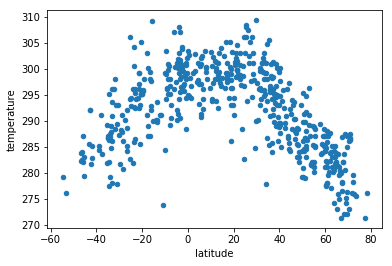

In [19]:
#print(df_.iloc[:,6])
latVtemp = df_.plot.scatter(x='latitude', y='temperature')
latVtemp.set_xlabel("latitude")
latVtemp.set_ylabel("temperature")
figtemp = latVtemp.get_figure()
figtemp.savefig("output_data/latVtemp.png")


#### Latitude vs. Humidity Plot

In [20]:
latVhum = df_.plot.scatter(x='latitude', y='humidity')
latVhum.set_xlabel("latitude")
latVhum.set_ylabel("humidity")
figtemp = latVhum.get_figure()
figtemp.savefig("output_data/latVhum.png")

ValueError: scatter requires y column to be numeric

#### Latitude vs. Cloudiness Plot

In [21]:
latVcloud = df_.plot.scatter(x='latitude', y='cloudiness')
latVcloud.set_xlabel("latitude")
latVcloud.set_ylabel("cloudiness")
figtemp = latVcloud.get_figure()
figtemp.savefig("output_data/latVcloud.png")

ValueError: scatter requires y column to be numeric

#### Latitude vs. Wind Speed Plot

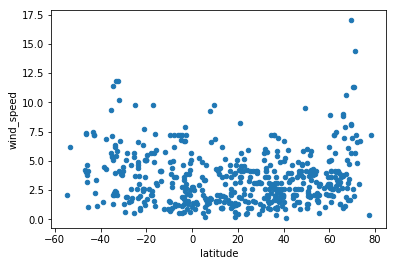

In [22]:
latVwspeed = df_.plot.scatter(x='latitude', y='wind_speed')
latVwspeed.set_xlabel("latitude")
latVwspeed.set_ylabel("wind_speed")
figtemp = latVwspeed.get_figure()
figtemp.savefig("output_data/latVwspeed.png")